**Hands on section: polarization data**

**1.**


Target: G11

Instrument: SOFIA/HAWC+

Link to download:  https://drive.google.com/file/d/1bu3p0wAtsbZG3vus_bUBFinqfvYXm7tp/view?usp=sharing

**2.**
Install packages: aplpy, astropy,

**3.**
Read fits file
*   See information of the fit file

**4.**
Plot maps of several parameters
*   Plot I, Q, U

**5.**
Calculate PI (polarization intensity), P (polarization degree)

**6.**
Plot B-field map
*   Apply signal/noise cut

**7.**
Calculate B-field strength using DCF method

#Step2



---



In [ ]:
# #install packages
!pip install astropy
!pip install scipy
!pip install aplpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 534.8/534.8 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.4/255.4 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
import os, sys
import numpy as np

import aplpy
import matplotlib.pyplot as plt
import astropy
from astropy.io import fits
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy.utils.data import get_pkg_data_filename



In [ ]:
#read fits file
# Define the filename for the G11 data
G11_filename = 'G11_HAWC_rebin_school.fits'
# Open the FITS file
hdul = fits.open(G11_filename)
# Print information about the FITS file
hdul.info()

Filename: G11_HAWC_rebin_school.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  STOKES I      1 PrimaryHDU      26   (103, 166)   float64   
  1  ERROR I       1 ImageHDU        27   (103, 166)   float64   
  2  STOKES Q      1 ImageHDU        27   (103, 166)   float64   
  3  ERROR Q       1 ImageHDU        27   (103, 166)   float64   
  4  STOKES U      1 ImageHDU        27   (103, 166)   float64   
  5  ERROR U       1 ImageHDU        27   (103, 166)   float64   


In [ ]:
# Print the header of the first layer (or extension)
# The number in the square brackets [] corresponds to the index of the extension
#you can change the number in [] to print its header
hdul[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  103                                                  
NAXIS2  =                  166                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CDELT1  =  -0.0025277777777778 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0025277777777778 / [deg] Coordinate increment at reference point  
CRVAL1  =      272.60697778244 / [deg] Coordinate value at reference point      
CRVAL2  =     -19.331973147643 / [deg] Coordinate value at reference point      
CRPIX1  =                52.25 / Pixel coordinate of reference point            
CRPIX2  =                83.

**Important things in header**

BITPIX	Data type

NAXIS	Number of data dimensions (typically 2 for images)

NAXIS1, NAXIS2	Number of pixels along each axis

CDELT1, CDELT2	Pixel size in degrees

CRVAL1, CRVAL2	World coordinates (RA, Dec) at the reference pixel

CRPIX1, CRPIX2	Reference pixel coordinates

CUNIT1, CUNIT2	Units for the coordinate axes (usually degrees)

EQUINOX	Epoch of the celestial coordinate system (e.g., 2000.0 = J2000)

BUNIT	Unit of the data

BMAJ, BMIN, BPA	Beam size and position angle


In [ ]:
hdul[1].header['BUNIT'] #you can change the number, or the name in [] to print what you want

'Jy/pixel'

In [ ]:
I = hdul['STOKES I']                  # I  [Jy/pix]
Q = hdul['STOKES Q']                  # Q
U = hdul['STOKES U']                  # U
sigma_I = hdul['ERROR I']             # error I
sigma_Q = hdul['ERROR Q']             # error Q
sigma_U = hdul['ERROR U']             # error U


In [ ]:
#I is the variable to store this HDU — it contains both:
#I.data: the 2D array of total intensity values
#I.header: the FITS header with metadata (e.g., WCS, beam size, units)

I.data #print I data
#I.header #print I header

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype='>f8')

# New Section

In [ ]:
# Extract data arrays
idata = I.data
qdata = Q.data
udata = U.data
ie = sigma_I.data
qe = sigma_Q.data
ue = sigma_U.data

# --- Polarization Angle  (in degrees)
ang = np.degrees(0.5 * np.arctan2(udata, qdata))     # polarization angle
bang = ang + 90                                      # magnetic field angle
# --- Error of Polarization Angle (degrees) ---
eang = 0.5 * (180 / np.pi) * np.sqrt((qdata**2 * ue**2 + udata**2 * qe**2) / (qdata**2 + udata**2))

# --- Polarized Intensity (PI) and its uncertainty ---
pi = np.sqrt(qdata**2 + udata**2)
epi = np.sqrt((qe**2 * qdata**2 + ue**2 * udata**2) / (qdata**2 + udata**2))

# --- Polarization degree  (%) and its uncertainty ---
p = 100 * pi / idata
ep = 100 * np.sqrt((epi**2 / idata**2) + ((pi**2 * ie**2) / idata**4))

# Polarisation Map

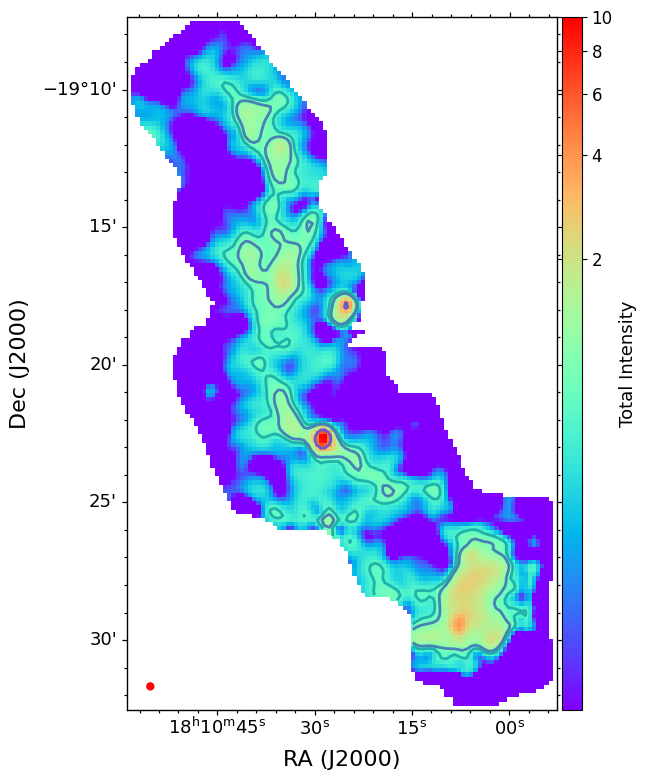

In [ ]:
#plot I map
#change to other indices to plot Q, U, etc.
fig = aplpy.FITSFigure(I,hdu=0)
fig.show_contour(I,levels=[0.7,1,4],colors=['lightseagreen','steelblue','slateblue'],linewidths = 2)
fig.show_colorscale(cmap='rainbow',vmin=0.1, vmax=10,stretch='log')
fig.add_colorbar()
fig.colorbar.set_axis_label_text('Total Intensity')
fig.add_beam(facecolor='red', edgecolor='black',linewidth=0, pad=1, corner='bottom left')
fig.colorbar.set_axis_label_font(size=13)
fig.colorbar.set_font(size=12)
fig.tick_labels.set_font(size=13)
fig.axis_labels.set_font(size=16)
plt.show()


In [ ]:
import numpy as np
import aplpy
import matplotlib.pyplot as plt
from astropy.io import fits

def plot_magnetic_field_map(I, p, bang, idata, ie,ep, title=None):
    # --- Set up figure ---
    fig = aplpy.FITSFigure(I, figsize=(12, 8))
    cmap = 'rainbow'

    # --- Set vector magnitude to 1 for equal-length arrows ---
    p_uniform = np.ones_like(p)

    # --- Apply mask for data
    i_err_limit = 20
    p_err_limit = 3

    mask_i = (idata / ie) < i_err_limit
    mask_p = (p / ep) < p_err_limit
    mask_combined = np.logical_or(mask_i, mask_p)

    p_uniform[mask_combined] = np.nan
    bang_masked = np.copy(bang)
    bang_masked[mask_combined] = np.nan
    idata = np.where(idata > 0, idata, np.nan)

    # --- Show intensity background ---
    fig.show_colorscale(vmin=np.nanpercentile(idata, 5),
                        vmax=np.nanpercentile(idata, 99),
                        cmap=cmap,
                        stretch='log')


    p_hdu = fits.ImageHDU(data=p_uniform, header=I.header)
    bang_hdu = fits.ImageHDU(data=bang_masked, header=I.header)
    # --- Show magnetic field vectors ---
    scalevec = 2
    fig.show_vectors(p_hdu, bang_hdu, scale=scalevec, step=2)

    # --- Show contours ---
    fig.show_contour(I, levels=[0.5,1,1.5],smooth=1, colors='blue', linewidths=1)

    # --- Colorbar and beam ---
    fig.add_colorbar()
    fig.colorbar.set_axis_label_text('I (Jy/pix)')

    fig.add_beam(facecolor='red', edgecolor='black', linewidth=1.5, pad=1, corner='bottom left')
    fig.add_label(0.02, 0.02, 'Beam FWHM', relative=True, size='small', weight='bold')

    # ---  vector scale bar ---
    pxscale = abs(I.header['CDELT2']) * 3600  # arcsec/pixel
    vectscale_deg = scalevec * pxscale / 3600

    # --- Title and axes ---
    if title:
        fig.set_title(title)
    fig.tick_labels.set_font(size='small')
    fig.axis_labels.set_font(size='small')

    plt.show()
    return fig


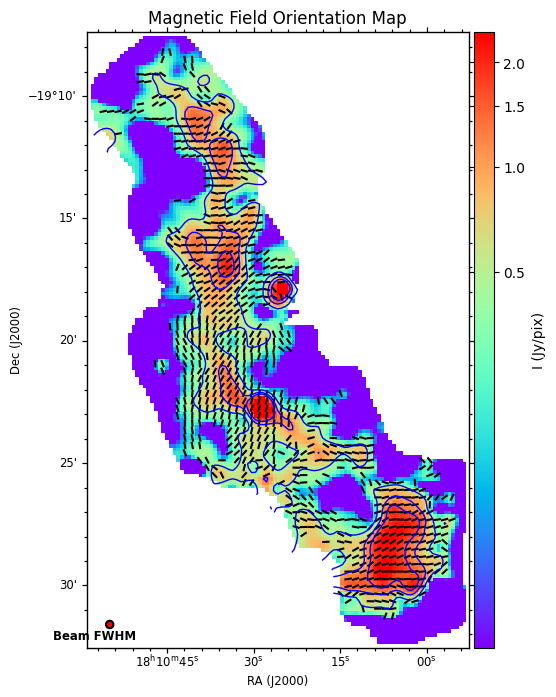

In [ ]:
plot_magnetic_field_map(I, p, bang, idata, ie,ep, title='Magnetic Field Orientation Map')


**Q: change the S/N cuts, how is the maps changed?**

Feel free to play with the contouring, color, vector scale, etc.

Are the magnetic fields generally parallel or perpendicular to the structure?